**Vanessa Navarro Coronado e Iván Sánchez Castellanos**

# Práctica 1 NO TERMINADA

Primero importamos las librerías que vamos a usar

In [3]:
# Always load all scipy stack packages
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

# Misc
import base64

In [4]:
# This code configures matplotlib for proper rendering
%matplotlib inline
mpl.rcParams["figure.figsize"] = "8, 4"
import warnings
warnings.simplefilter("ignore")

Esto es para realizar nuestros procesos de holdout con una semilla, para poder reproducir nuestros resultados

In [5]:
# En vuestros experimentos usad siempre una semilla, si no nunca los podreis recuperar
seed=6342
np.random.seed(6342) #DECLARARLA AL PRINCIPIO DEL CUADERNO Y BORRAR EL KERNEL

## 1. Análisis exploratorio mediante gráficas y estadísticos. Interpretación de las distribuciones de las variables más relevantes y su relación con la clase. Identificación de anomalías y tratamiento de datos perdidos.

Cargamos las bases de datos

In [6]:
# Please update your data path accordingly
df1 = pd.read_csv("../data/pima.csv", dtype={ "label": 'category'})
df2 = pd.read_csv("../data/wisconsin.csv", dtype={ "label": 'category'})

Comprobamos que se han cargado los datasets

In [7]:
# Retrieve a random sample from the dataframe
df1.sample(8)

,preg,plas,pres,skin,insu,mass,pedi,age,label
408,8,100,74,40,215,39.4,0.661,43,tested_positive
722,1,88,78,29,76,32.0,0.365,29,tested_negative
668,4,116,72,12,87,22.1,0.463,37,tested_negative
121,2,108,62,32,56,25.2,0.128,21,tested_negative
239,1,199,76,43,0,42.9,1.394,22,tested_positive
30,7,133,88,15,155,32.4,0.262,37,tested_negative
109,1,119,54,13,50,22.3,0.205,24,tested_negative
675,1,151,60,0,0,26.1,0.179,22,tested_negative


In [8]:
# Retrieve a random sample from the dataframe
df2.sample(8)

,patientId,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses,label
155,156,3,1,1,1,2,1.0,3,1,1,benign
109,110,4,5,5,10,4,10.0,7,5,8,malignant
183,184,9,7,7,5,5,10.0,7,8,3,malignant
258,259,1,4,3,10,4,10.0,5,6,1,malignant
473,474,3,1,1,1,2,1.0,2,1,1,benign
26,27,5,1,1,1,2,1.0,2,1,1,benign
515,516,4,1,1,1,2,3.0,2,1,1,benign
200,201,6,10,7,7,6,NaN,8,10,2,malignant


Analizamos los datasets

In [9]:
# Number of cases is just the length of the dataframe
print( len(df1) )
print( df1.shape )
print( df1.size ) # multiplcación de filas x columnas

768
(768, 9)
6912


In [10]:
# Number of cases is just the length of the dataframe
print( len(df2) )
print( df2.shape )
print( df2.size ) # multiplcación de filas x columnas

699
(699, 11)
7689


In [11]:
# We can inspect categorical variables:
df1.label.cat.categories

Index(['tested_negative', 'tested_positive'], dtype='object')

In [12]:
# We can inspect categorical variables:
df2.label.cat.categories

Index(['benign', 'malignant'], dtype='object')

Visualizamos los datasets con los histogramas

In [13]:
def gMultipleHistogram(targetdf):
    # First we remove the class variable
    target_noclass = targetdf.drop('label', 1) #USAR SIEMPRE 'LABEL', PORQUE 'CLASS' ES PALABRA RESERVADA
    # Now we generate the multiple histogram
    g = sns.FacetGrid(pd.melt(target_noclass), col="variable", sharey=False, sharex=False, col_wrap=2)
    g.map(sns.distplot, "value");

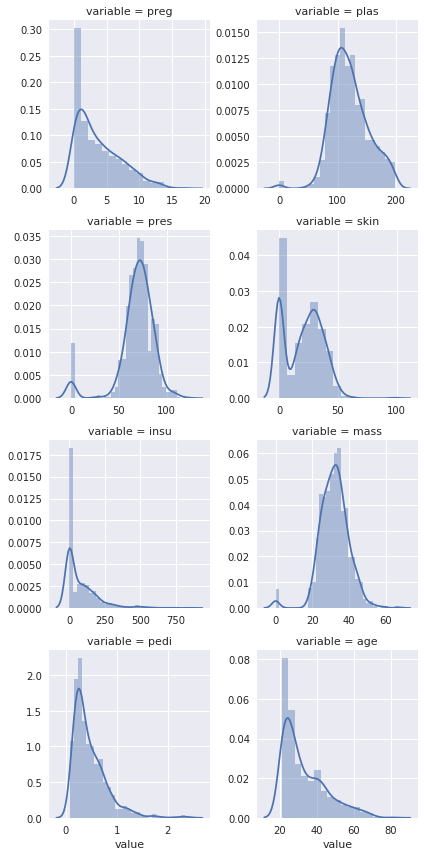

In [14]:
gMultipleHistogram(df1)

En el dataset df2 (wisconsin) tenemos una variable id que no nos aporta nada sobre las demás variables, o sobre la variable clase. Por tanto, prescindimos de ella.

In [15]:
df2_sinId=df2.drop('patientId',1)

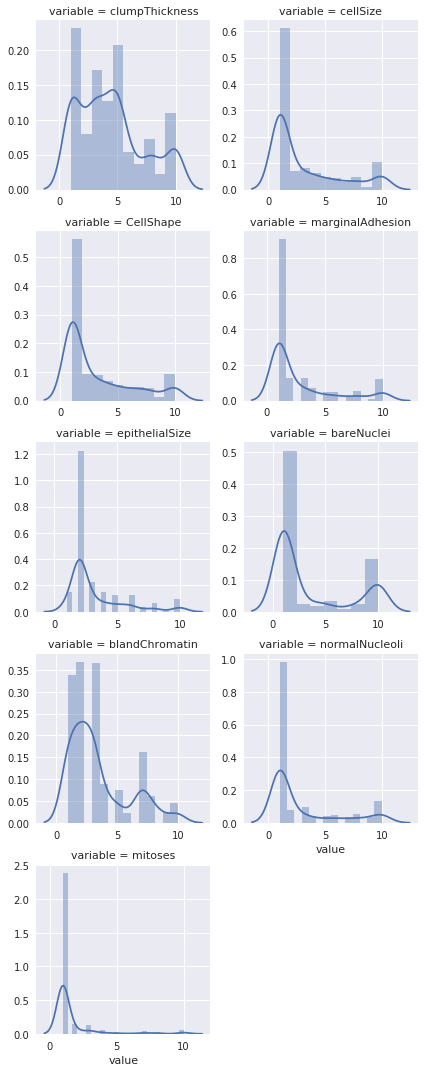

In [16]:
gMultipleHistogram(df2_sinId)

COMENTAR VARIABLES MÁS DESCRIPTIVAS Y HABLAR SOBRE VALORES ANOMALOS

Diagrama de barras para ver la distribución de la clase

In [17]:
def gSingleBarplot(targetDf, targetVar):
    sns.countplot(data=targetDf, x=targetVar)

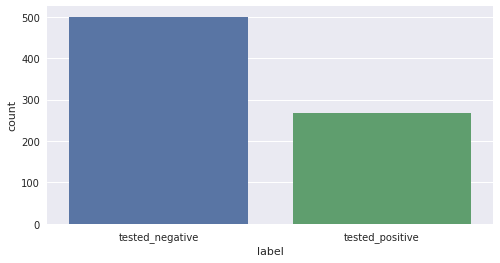

In [18]:
gSingleBarplot(df1, "label") #para ver los 2 estados de la variable categorica

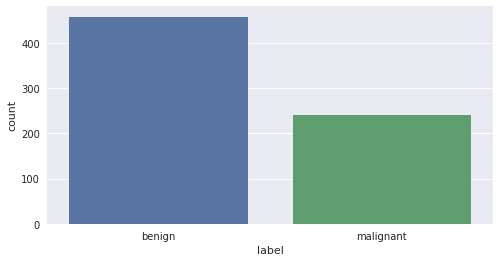

In [19]:
gSingleBarplot(df2, "label") #para ver los 2 estados de la variable categorica

COMENTAR CLASES

Visualizamos algunos estadísticos

In [20]:
df1.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [21]:
df2_sinId.describe()

,clumpThickness,cellSize,CellShape,marginalAdhesion,epithelialSize,bareNuclei,blandChromatin,normalNucleoli,mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,667.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.536732,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.683795,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,7.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


COMENTAR ESTADÍSTICOS, probar a hacer boxplot de algunas variables relevantes

In [22]:
def gSingleBoxplot(targetdf, att):
    sns.boxplot(x='label', y=att, data=targetdf)

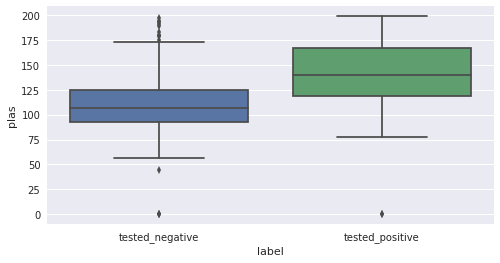

In [23]:
gSingleBoxplot(df1,'plas')

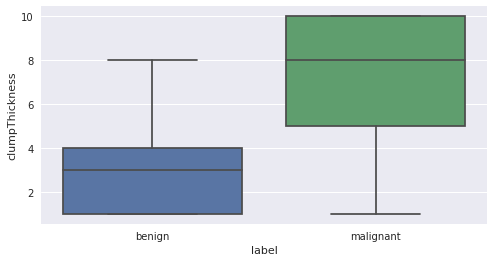

In [24]:
gSingleBoxplot(df2,'clumpThickness')

## 2. Aprendizaje y evaluación de un clasificador zeroR (con holdout).

In [25]:
df1.label.mode()

0    tested_negative
Name: label, dtype: category
Categories (2, object): [tested_negative, tested_positive]

In [26]:
df2.label.mode()

0    benign
Name: label, dtype: category
Categories (2, object): [benign, malignant]

Primero debemos usar la función trainZeroR, que se nos proporcionaba en el guión de la práctica 1, para crear nuestro clasificador ZeroR. Con este clasificador, nuevas instancias en el dataset deberán ser predichas usando la etiqueta mayoritaria en nuestra variable clase (label). Para ello, creamos una nueva columna en el dataset llamada prediction.

In [27]:
# This is the outer function that should return the classifier function
def trainZeroR(trainingData):
    # We first learn the parameters, aka, the most probable class
    # Tip! get the class variable mode and take the first value
    majorClass = trainingData.label.mode()[0] # <-- COMPLETE
    
    # Now we create and return the classifier function
    def classifier( data ):
        return data.assign( prediction=majorClass ) # <-- COMPLETE
    
    return classifier

Antes de probar el clasificador con nuestros datasets, debemos realizar un proceso de holdout balanceado, en el que haya una parte proporcionada de la base de datos que se utilice para entrenar el clasificador (Train), y otra parte del dataset que usemos para validar nuestro modelo aprendido (Test). Pero antes de realizar esta separación de los datasets en conjuntos de Train y Test, debemos desordenar las bases de datos usando nuestra semilla (declarada al principio del cuaderno) para que permute los índices de los casos, consiguiendo así una partición balanceada de los casos.

In [28]:
# We must always divide our dataset into attributes and label
attributesdf1 = df1.drop('label', 1)
labeldf1 = df1['label']

attributesdf2 = df2.drop('label', 1)
labeldf2 = df2['label']

In [29]:
from sklearn.model_selection import train_test_split
train_atts1, test_atts1, train_label1, test_label1 = train_test_split( 
    attributesdf1, # Dataset con los atributos
    labeldf1, # Vector/dataset con la clase
    test_size=0.4, # Proporcion de test
    random_state=seed, # Semilla
    stratify=labeldf1) # Variable a estratificar

In [30]:
from sklearn.model_selection import train_test_split
train_atts2, test_atts2, train_label2, test_label2 = train_test_split( 
    attributesdf2, # Dataset con los atributos
    labeldf2, # Vector/dataset con la clase
    test_size=0.4, # Proporcion de test
    random_state=seed, # Semilla
    stratify=labeldf2) # Variable a estratificar

In [31]:
pimaTraining = train_atts1.assign(label = train_label1)
pimaTest = test_atts1.assign(label = test_label1)

wisconsinTraining = train_atts2.assign(label = train_label2)
wisconsinTest = test_atts2.assign(label = test_label2)

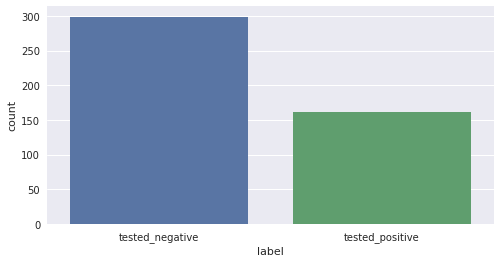

In [32]:
gSingleBarplot(pimaTraining, "label")

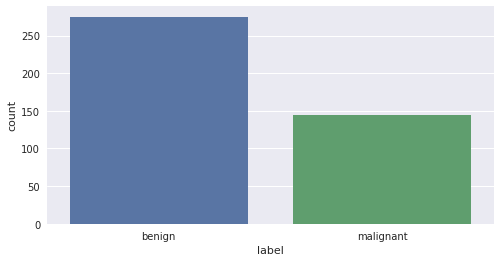

In [33]:
gSingleBarplot(wisconsinTraining, "label")

A continuación usamos la función trainAndEvalClassifier del guión de la práctica1, para entrenar el clasificador, y validarlo con el conjunto de test.

In [40]:
# The star notated argument are cale varargs, and can be passed to inner functions
def trainAndEvalClassifier(classifier, trainingDf, testDf, **kwargs):
    model = classifier(trainingDf, **kwargs)
    predictedDf = model(testDf)
    tab = pd.crosstab(predictedDf['label'], predictedDf['prediction'])
    comparison = predictedDf[predictedDf['label'] == predictedDf['prediction'] ]
    accuracy = len(comparison) / len(predictedDf)
    return (tab, accuracy)

Primero con pima

In [43]:
(tab1, accuracy1) = trainAndEvalClassifier(trainZeroR, pimaTraining, pimaTest)

In [44]:
tab1

prediction,tested_negative
label,
tested_negative,201
tested_positive,107


In [45]:
print("Accuracy pima:", accuracy1)

Accuracy pima: 0.6525974025974026


Y ahora con el dataset wisconsin

In [46]:
(tab2, accuracy2) = trainAndEvalClassifier(trainZeroR, wisconsinTraining, wisconsinTest)

In [47]:
tab2

prediction,benign
label,
benign,183
malignant,97


In [48]:
print("Accuracy wisconsin:", accuracy2)

Accuracy wisconsin: 0.6535714285714286


Como vemos, en ambos casos hay demasiadas instancias mal clasificadas...

## 3. Aprendizaje y evaluación de un clasificador oneR (con holdout).

## 4. Aprendizaje y evaluación de un árbol de decisión (con holdout).

## 5. Comparativa de los tres algoritmos.